In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
marks_df = pd.read_csv("Downloads/Machine-Learning-master/LogisticRegression/data/marks.txt", header = None)

In [3]:
#consider matrix X as all columns except last column
X = marks_df.iloc[:,:-1]

In [4]:
#last column as Y
Y = marks_df.iloc[:,-1]

In [5]:
#filter based on Y value
# if Y is 1 consider that as admitted
admitted = marks_df.loc[Y==1]

In [6]:
# if Y is 0 consider that as not_admitted
not_admitted = marks_df.loc[Y==0]

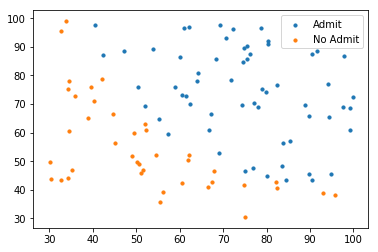

In [7]:
#display scatter plot for admitted and not admitted
plt.scatter(admitted.iloc[:,0], admitted.iloc[:,1], s = 10, label = 'Admit')
plt.scatter(not_admitted.iloc[:,0], not_admitted.iloc[:,1], s = 10, label = 'No Admit')
plt.legend()
plt.show()

In [8]:
X.shape

(100, 2)

In [9]:
#prepare X required for linear regression
# i,e adding columns of 1 as first column
X = np.c_[np.ones((X.shape[0],1)),X] #np.c_ concatenates two matrices along second axis

In [10]:
Y = Y[:, np.newaxis] #convert it into 2D

In [11]:
#create column matrix theta (default vale = 0)
theta = np.zeros((X.shape[1],1))

In [12]:
#implement sigmoid function 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

sigmoid function
$$ g(z) = \frac{1}{1+e^{-z}} $$

$$ z = (X.\theta) = \theta^T X$$

In [13]:
def net_input(theta, x):
    return np.dot(x,theta)

In [14]:
def probability(theta,x):
    return sigmoid(net_input(theta,x))

\begin{align}
L(\theta) = \prod (h_{\theta}(x)^y(1-h_{\theta}(x))^{1-y})
\end{align}

\begin{align}
cost = l(\theta) = \sum (y log h_{\theta}(x) +(1-y) log(1-h_{\theta}(x)))
\end{align}

taking mean

\begin{align}
cost = l(\theta) = (1/m)\sum (y log h_{\theta}(x) +(1-y) log(1-h_{\theta}(x)))
\end{align}

In [15]:
def cost_function (theta, x, y):
    m = x.shape[0]
    cost = -(1/m) * np.sum(y*np.log(probability(theta,x)) + (1-y)*np.log(1-probability(theta,x)))
    return cost

In [16]:
def gradient(theta, x, y):
    m = x.shape[0]
    return (1/m)*np.dot(x.T, sigmoid(net_input(theta,x))-y)

In [17]:
from scipy.optimize import fmin_tnc
def fit(x, y, theta):
   
        opt_weights = fmin_tnc(func=cost_function, x0=theta, fprime=gradient,
                               args=(x, y.flatten()))
        return opt_weights[0]


Minimize a function with variables subject to bounds, using
gradient information

'func', 'x0', 'fprime=None', 'args=()'

func : callable ``func(x, *args)``
    Function to minimize.

fprime : callable ``fprime(x, *args)``, optional, Gradient of `func`. If None, then either `func` must return the
    function value and the gradient

In [19]:
parameters = fit(X, Y, theta)

In [20]:
#returns theta
parameters

array([-25.1613186 ,   0.20623159,   0.20147149])

In [21]:
#to plot, find range of X axis
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]

$$\theta _{2} = -(\frac{\theta _{0} + \theta _{1} x_{1}}{x_{2}})$$

In [22]:
#find value for theta2
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

In [23]:
type(y_values)

numpy.ndarray

In [24]:
y_values.shape

(2,)

In [25]:
print(x_values)
print(y_values)

[25.05882244669796, 103.86943574220612]
[99.23686099 18.56421453]


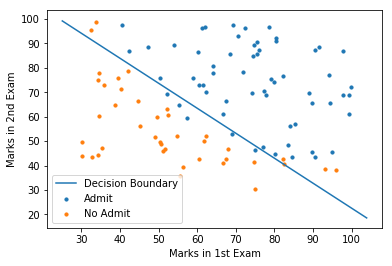

In [26]:
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
#plt.show()

plt.scatter(admitted.iloc[:,0], admitted.iloc[:,1], s = 10, label = 'Admit')
plt.scatter(not_admitted.iloc[:,0], not_admitted.iloc[:,1], s = 10, label = 'No Admit')
plt.legend()
plt.show()